In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

"""
Dataset Kaggle
https://www.kaggle.com/harlfoxem/housesalesprediction

Referencias
https://www.kaggle.com/bsivavenu/house-price-calculation-methods-for-beginners?select=test.csv
https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
https://www.researchgate.net/figure/Relationship-of-quartiles-and-inter-quartile-range-Legends-Q-1-first-quartile-Q-3_fig2_324532937
"""

'\nDataset Kaggle\nhttps://www.kaggle.com/harlfoxem/housesalesprediction\n\nReferencias\nhttps://www.kaggle.com/bsivavenu/house-price-calculation-methods-for-beginners?select=test.csv\nhttps://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c\nhttps://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba\nhttps://www.researchgate.net/figure/Relationship-of-quartiles-and-inter-quartile-range-Legends-Q-1-first-quartile-Q-3_fig2_324532937\n'

In [3]:
# Load CSV as Dataframe
df = pd.read_csv('kc_house_data.csv')  # load data set
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


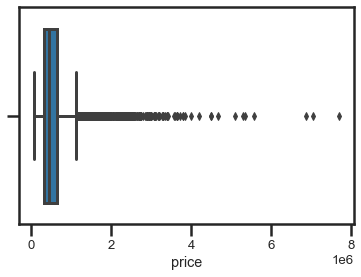

In [4]:
# Print boxplot (Quartile)
sns.set_style("ticks")
sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.7})
sns.boxplot(x=df['price'])

In [5]:
# Remove outliers
Y_no_o = df.price[df.price.between(df.price.quantile(.10), df.price.quantile(.90))]
new_df = df.iloc[Y_no_o.axes[0]]
new_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


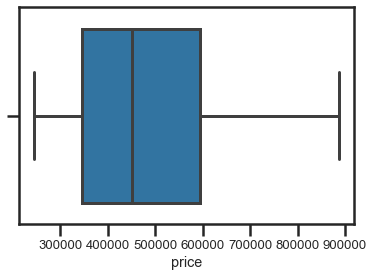

In [6]:
# Print boxplot without outliers (Quartile)
sns.set_style("ticks")
sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.7})
sns.boxplot(x=new_df['price'])

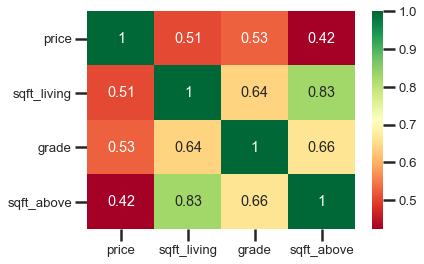

In [7]:
# Print most correlated features
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["price"]) > 0.6]
sns.set_style("ticks")
sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.7})
g = sns.heatmap(new_df[top_corr_features].corr(), annot=True, cmap="RdYlGn")


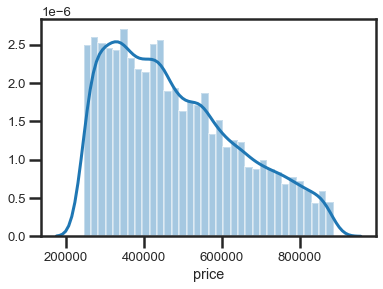

In [8]:
# Graph distribution for price
sns.set_style("ticks")
sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.7})
sns.distplot(new_df['price'])

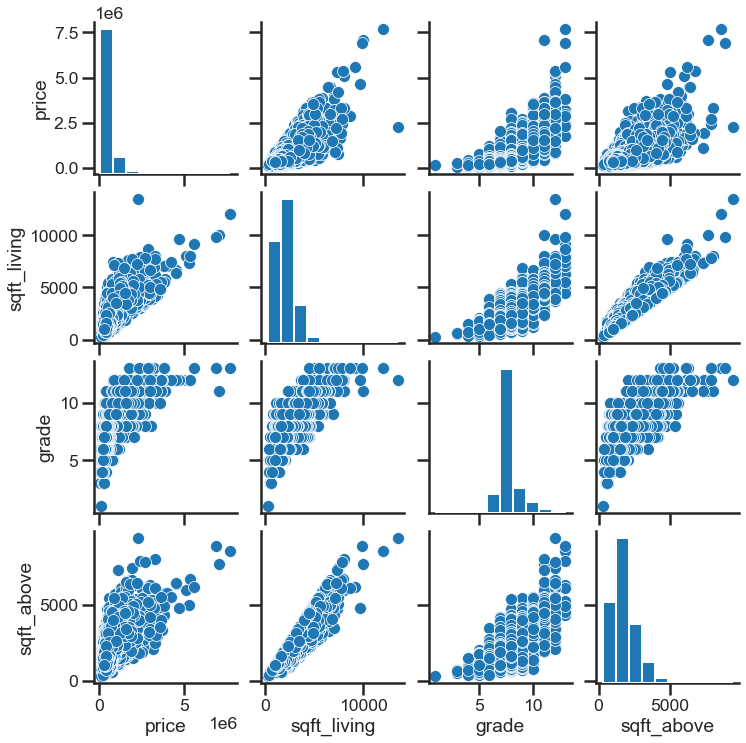

In [9]:
#Create pairplot
sns.set_style("ticks")
sns.set_context("poster", font_scale = .8, rc={"grid.linewidth": 0.6})
sns.pairplot(data=df[["price","sqft_living","grade","sqft_above"]], dropna=True)

In [11]:
#Regression Model
from sklearn.model_selection import train_test_split
X = new_df[["sqft_living","grade","sqft_above"]].values
y = new_df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
# Compare Actual vs Predicted
y_pred = regressor.predict(X_test)
df_p = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df_p.head(25)
df1

,Actual,Predicted
0,449500.0,451202.834240
1,319000.0,518700.284774
2,625000.0,502683.189961
3,425000.0,448232.043475
4,267500.0,310612.381830
5,485000.0,428567.992514
6,275000.0,420650.915236
7,380000.0,490362.261089
8,445000.0,440269.547018
9,332000.0,524694.866707


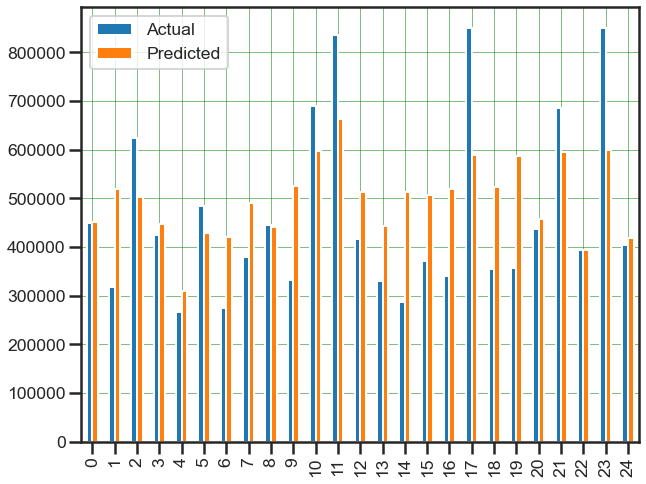

In [13]:
# Graph Actual vs Predicted values
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [25]:
import numpy as np
regressor.predict(np.array([[2570, 7,2170]]))

array([479335.24216079])